### Data Prep

Scroll to analysis section if you already have the _NOTA In top 3.csv_ file.

In [1]:
import pandas as pd
import numpy as np

In [2]:
constituency_wide_data = pd.read_csv('Constituency Wide Data.csv')
constituency_wide_data = constituency_wide_data.astype({'total_votes': int})

In [3]:
constituency_wide_data.head()

,name_of_state_or_ut,type,state_ut_code,constituency_code,constituency_name,candidate_name,candidate_party,total_votes
0,Andaman & Nicobar Islands,Union Territory,U01,1,Andaman&NicobarIslands,BISHNU PADA RAY,Bharatiya Janata Party,102436
1,Andaman & Nicobar Islands,Union Territory,U01,1,Andaman&NicobarIslands,KULDEEP RAI SHARMA,Indian National Congress,78040
2,Andaman & Nicobar Islands,Union Territory,U01,1,Andaman&NicobarIslands,MANOJ PAUL,Andaman Nicobar Democratic Congress,8254
3,Andaman & Nicobar Islands,Union Territory,U01,1,Andaman&NicobarIslands,D AYYAPPAN,Communist Party of India (Marxist),6017
4,Andaman & Nicobar Islands,Union Territory,U01,1,Andaman&NicobarIslands,V.K. ABDUL AZIZ,Independent,2203


In [4]:
constituency_wide_data[constituency_wide_data['candidate_party']=='None of the Above']

,name_of_state_or_ut,type,state_ut_code,constituency_code,constituency_name,candidate_name,candidate_party,total_votes
12,Andaman & Nicobar Islands,Union Territory,U01,1,Andaman&NicobarIslands,NOTA,None of the Above,1809
28,Andhra Pradesh,State,S01,7,Amalapuram(SC),NOTA,None of the Above,13518
44,Andhra Pradesh,State,S01,5,Anakapalle,NOTA,None of the Above,26235
66,Andhra Pradesh,State,S01,19,Ananthapur,NOTA,None of the Above,9199
80,Andhra Pradesh,State,S01,1,Araku(ST),NOTA,None of the Above,50470
...,...,...,...,...,...,...,...,...
8858,West Bengal,State,S25,5,Raiganj,NOTA,None of the Above,1940
8866,West Bengal,State,S25,13,Ranaghat,NOTA,None of the Above,9893
8878,West Bengal,State,S25,27,Srerampur,NOTA,None of the Above,15034
8888,West Bengal,State,S25,30,Tamluk,NOTA,None of the Above,8265


In [5]:
constituencies = list(constituency_wide_data.value_counts(['state_ut_code', 'constituency_code']).index)

In [6]:
len(constituencies)

543

In [ ]:
nota_in_top_3 = {
    'name_of_state_or_ut': [],
    'state_ut_code': [],
    'constituency_code': [],
    'constituency_name': [],
    'winner_votes': [],
    'nota_votes': [],
    'nota_position': [],
    'runner_votes': []
}
for constituency in constituencies:
    constituency_info = constituency_wide_data[(constituency_wide_data['state_ut_code'] == constituency[0]) & (constituency_wide_data['constituency_code'] == constituency[1])]
    constituency_info.sort_values('total_votes', ascending=False, inplace=True)
    constituency_info = constituency_info.iloc[:3]
    if 'None of the Above' in constituency_info['candidate_party'].values:
        print(constituency_info['name_of_state_or_ut'].iloc[0], constituency_info['constituency_name'].iloc[0])
        nota_in_top_3['name_of_state_or_ut'].append(constituency_info['name_of_state_or_ut'].iloc[0])
        nota_in_top_3['state_ut_code'].append(constituency_info['state_ut_code'].iloc[0])
        nota_in_top_3['constituency_code'].append(constituency_info['constituency_code'].iloc[0])
        nota_in_top_3['constituency_name'].append(constituency_info['constituency_name'].iloc[0])
        nota_in_top_3['winner_votes'].append(constituency_info['total_votes'].iloc[0])
        nota_in_top_3['nota_votes'].append(
           constituency_info.iloc[list(constituency_info['candidate_party'].values).index('None of the Above')]['total_votes']
        )
        if list(constituency_info['candidate_party'].values).index('None of the Above') == 1:
            nota_in_top_3['runner_votes'].append(constituency_info['total_votes'].iloc[2])
        else:
            nota_in_top_3['runner_votes'].append(constituency_info['total_votes'].iloc[1])
        nota_in_top_3['nota_position'].append(list(constituency_info['candidate_party'].values).index('None of the Above') + 1)

In [16]:
nota_in_top_3_df = pd.DataFrame(nota_in_top_3)

In [17]:
nota_in_top_3_df

,name_of_state_or_ut,state_ut_code,constituency_code,constituency_name,winner_votes,nota_votes,nota_position,runner_votes
0,Karnataka,S10,27,Chikkballapur,822619,6596,3,659159
1,Maharashtra,S13,29,MumbaiNorthCentral,445545,9749,3,429031
2,Karnataka,S10,25,Bangalorecentral,658915,12126,3,626208
3,NCT OF Delhi,U05,6,WestDelhi,842658,8699,3,643645
4,Maharashtra,S13,25,Thane,734231,17901,3,517220
...,...,...,...,...,...,...,...,...
97,Gujarat,S06,4,Mahesana,686406,11626,3,358360
98,Madhya Pradesh,S12,27,KHARGONE,819863,18257,3,684845
99,Bihar,S04,19,Maharajganj,529533,21687,3,426882
100,Assam,S03,14,Jorhat,751771,14555,3,607378


In [18]:
nota_in_top_3_df.to_csv('NOTA In Top 3.csv', index=False)

In [19]:
constituency_info

,name_of_state_or_ut,type,state_ut_code,constituency_code,constituency_name,candidate_name,candidate_party,total_votes
1737,Gujarat,State,S06,24,Surat,MUKESHKUMAR CHANDRAKAANT DALAL ( Uncontested ),Bharatiya Janata Party,0


In [20]:
list(constituency_info['candidate_party'].values).index('Bharatiya Janata Party')

0

## Data Analysis

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import altair as alt
import plotly.express as px

In [21]:
constituency_wise_data_df = pd.read_csv('Constituency Wide Data.csv')
# nota_in_top_3_df = pd.read_csv('NOTA In Top 3.csv')

In [22]:
constituency_wise_data_df.head()

,name_of_state_or_ut,type,state_ut_code,constituency_code,constituency_name,candidate_name,candidate_party,total_votes
0,Andaman & Nicobar Islands,Union Territory,U01,1,Andaman&NicobarIslands,BISHNU PADA RAY,Bharatiya Janata Party,102436
1,Andaman & Nicobar Islands,Union Territory,U01,1,Andaman&NicobarIslands,KULDEEP RAI SHARMA,Indian National Congress,78040
2,Andaman & Nicobar Islands,Union Territory,U01,1,Andaman&NicobarIslands,MANOJ PAUL,Andaman Nicobar Democratic Congress,8254
3,Andaman & Nicobar Islands,Union Territory,U01,1,Andaman&NicobarIslands,D AYYAPPAN,Communist Party of India (Marxist),6017
4,Andaman & Nicobar Islands,Union Territory,U01,1,Andaman&NicobarIslands,V.K. ABDUL AZIZ,Independent,2203


In [23]:
nota_in_top_3_df.head()

,name_of_state_or_ut,state_ut_code,constituency_code,constituency_name,winner_votes,nota_votes,nota_position,runner_votes
0,Karnataka,S10,27,Chikkballapur,822619,6596,3,659159
1,Maharashtra,S13,29,MumbaiNorthCentral,445545,9749,3,429031
2,Karnataka,S10,25,Bangalorecentral,658915,12126,3,626208
3,NCT OF Delhi,U05,6,WestDelhi,842658,8699,3,643645
4,Maharashtra,S13,25,Thane,734231,17901,3,517220


### State wise distribution

In [27]:
chart = alt.Chart(nota_in_top_3_df)

In [28]:
chart = alt.Chart(nota_in_top_3_df).transform_aggregate(count='count()', groupby=['name_of_state_or_ut']).mark_bar().encode(
    x='name_of_state_or_ut:N',
    y='count:Q'
)
chart.show()

alt.Chart(...)

### Margin of victory of winning candidate in these constituencies

#### Dataset generation

In [29]:
first_row = nota_in_top_3_df.iloc[0]
first_row

name_of_state_or_ut        Karnataka
state_ut_code                    S10
constituency_code                 27
constituency_name      Chikkballapur
winner_votes                  822619
nota_votes                      6596
nota_position                      3
runner_votes                  659159
Name: 0, dtype: object

In [30]:
first_row['state_ut_code'], first_row['constituency_code']

('S10', 27)

In [31]:
constituency_per_candidate_vote = constituency_wise_data_df[
                            (constituency_wise_data_df['state_ut_code'] == first_row['state_ut_code']) & 
                            (constituency_wise_data_df['constituency_code'] == first_row['constituency_code'])
                    ].sort_values('total_votes', ascending=False)

In [32]:
total_votes = constituency_per_candidate_vote['total_votes'].sum()
print(total_votes)

1530820


In [33]:
winner_percentage_votes = constituency_per_candidate_vote['total_votes'].iloc[0]/total_votes
runner_votes = constituency_per_candidate_vote['total_votes'].iloc[1]/total_votes

mov = (winner_percentage_votes - runner_votes) * 100
print(mov)

10.677937314641827


In [ ]:
nota_in_top_3_df['mov'] = pd.Series(dtype='int')
nota_in_top_3_df['winning_party'] = pd.Series(dtype='str')
for i in range(len(nota_in_top_3_df)):
    row = nota_in_top_3_df.iloc[i]
    state_ut_code, constituency_code = row['state_ut_code'], row['constituency_code']
    constituency_per_candidate_vote = constituency_wise_data_df[
                            (constituency_wise_data_df['state_ut_code'] == state_ut_code) & 
                            (constituency_wise_data_df['constituency_code'] == constituency_code)
                    ].sort_values('total_votes', ascending=False)
    total_votes = constituency_per_candidate_vote['total_votes'].sum()
    winner_percentage_votes = constituency_per_candidate_vote['total_votes'].iloc[0]/total_votes
    runner_votes = constituency_per_candidate_vote['total_votes'].iloc[1]/total_votes
    winning_party = constituency_per_candidate_vote['candidate_party'].iloc[0]
    
    mov = (winner_percentage_votes - runner_votes) * 100
    nota_in_top_3_df['mov'].iloc[i] = mov
    nota_in_top_3_df['winning_party'].iloc[i] =  winning_party

In [35]:
nota_in_top_3_df.head()

,name_of_state_or_ut,state_ut_code,constituency_code,constituency_name,winner_votes,nota_votes,nota_position,runner_votes,mov,winning_party
0,Karnataka,S10,27,Chikkballapur,822619,6596,3,659159,10.677937,Bharatiya Janata Party
1,Maharashtra,S13,29,MumbaiNorthCentral,445545,9749,3,429031,1.813605,Indian National Congress
2,Karnataka,S10,25,Bangalorecentral,658915,12126,3,626208,2.484372,Bharatiya Janata Party
3,NCT OF Delhi,U05,6,WestDelhi,842658,8699,3,643645,13.054364,Bharatiya Janata Party
4,Maharashtra,S13,25,Thane,734231,17901,3,517220,16.577519,Shiv Sena


In [36]:
nota_in_top_3_df.to_csv('NOTA In Top 3.csv', index=False)

#### Analysis

In [37]:
parties = list(nota_in_top_3_df['winning_party'].value_counts().index)

In [38]:
parties

['Bharatiya Janata Party',
 'Indian National Congress',
 'Janata Dal  (United)',
 'Lok Janshakti Party(Ram Vilas)',
 'Telugu Desam',
 'Shiv Sena',
 'Shiv Sena (Uddhav Balasaheb Thackrey)',
 'Hindustani Awam Morcha (Secular)',
 'Nationalist Congress Party',
 'Rashtriya Janata Dal']

In [39]:
color_mapping = {
    parties[0]: '#ffa15a', #BJP
    parties[1]: '#636efa', #INC
    parties[2]: '#ef553b', #JD(U)
    parties[3]: '#ff6692', #LJP
    parties[4]: '#FFA500', #TDP
    parties[5]: '#FF4433', #Shiv Sena
    parties[6]: '#00FFFF', #Shiva Sena Uddhav Thackrey
    parties[7]: '#FFAC1C', #HAM (S)
    parties[8]: '#DAA06D', #NCP
    parties[9]: '#088F8F', #RJD
}

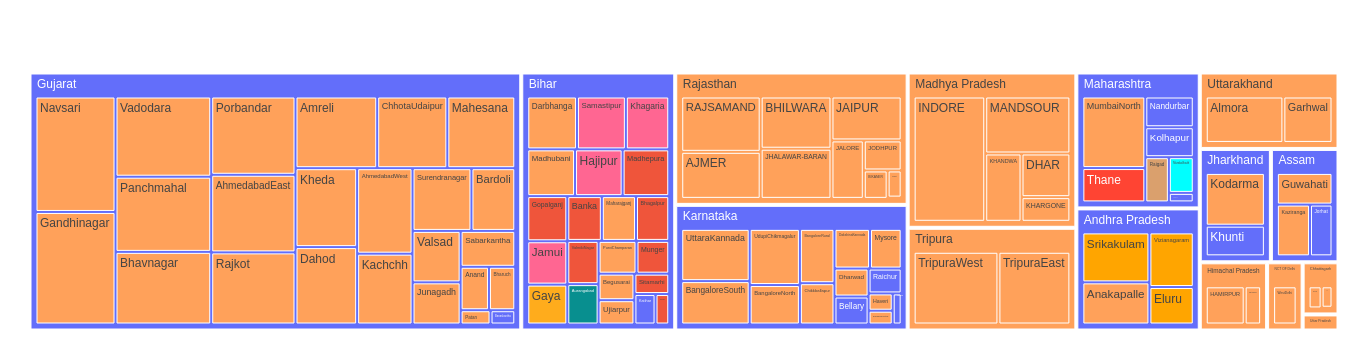

In [42]:
fig = px.treemap(
    nota_in_top_3_df, 
    path = ['name_of_state_or_ut', 'constituency_name'], 
    values = 'mov',
    # color='winning_party',
    color = nota_in_top_3_df['winning_party'],
    color_discrete_map = color_mapping
)
fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))
fig.show()

<Axes: ylabel='Density'>

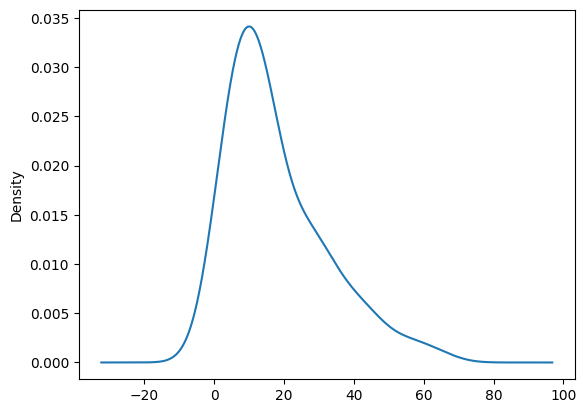

In [43]:
nota_in_top_3_df['mov'].plot.kde()

array([[<Axes: title={'center': 'mov'}>]], dtype=object)

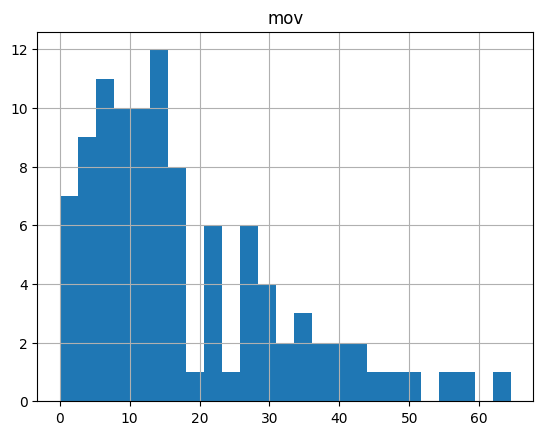

In [44]:
nota_in_top_3_df.hist(column='mov', bins=25)

#### Did NOTA change election potential

In [45]:
nota_in_top_3_df.head()

,name_of_state_or_ut,state_ut_code,constituency_code,constituency_name,winner_votes,nota_votes,nota_position,runner_votes,mov,winning_party
0,Karnataka,S10,27,Chikkballapur,822619,6596,3,659159,10.677937,Bharatiya Janata Party
1,Maharashtra,S13,29,MumbaiNorthCentral,445545,9749,3,429031,1.813605,Indian National Congress
2,Karnataka,S10,25,Bangalorecentral,658915,12126,3,626208,2.484372,Bharatiya Janata Party
3,NCT OF Delhi,U05,6,WestDelhi,842658,8699,3,643645,13.054364,Bharatiya Janata Party
4,Maharashtra,S13,25,Thane,734231,17901,3,517220,16.577519,Shiv Sena


In [78]:
nota_game_changer_df = nota_in_top_3_df[
    nota_in_top_3_df['nota_votes'] > (nota_in_top_3_df['winner_votes'] - nota_in_top_3_df['runner_votes']) 
]

In [79]:
nota_game_changer_df

,name_of_state_or_ut,state_ut_code,constituency_code,constituency_name,winner_votes,nota_votes,nota_position,runner_votes,mov,winning_party
7,Maharashtra,S13,27,MumbaiNorthWest,452644,15161,3,452596,0.005026,Shiv Sena
19,Rajasthan,S20,6,JAIPURRURAL,617877,7519,3,616262,0.127966,Bharatiya Janata Party
54,Bihar,S04,4,Sheohar,476612,30168,3,447469,2.760794,Janata Dal (United)
72,Chhattisgarh,S26,11,KANKER,597624,18669,3,595740,0.148882,Bharatiya Janata Party


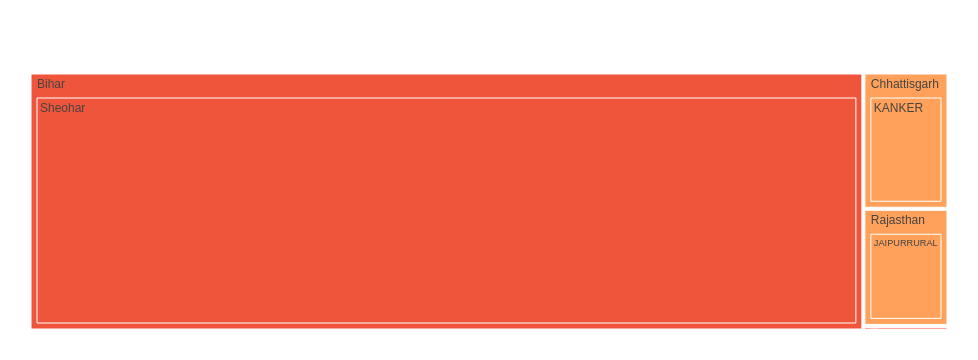

In [81]:
fig = px.treemap(
    nota_game_changer_df, 
    path = ['name_of_state_or_ut', 'constituency_name'], 
    values = 'mov',
    # color='winning_party',
    color = nota_game_changer_df['winning_party'],
    color_discrete_map = color_mapping
)
fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))
fig.show()

In [ ]:
########## Add number of urban constituencies that voted NOTA
########## Check the distribution of win percentage where NOTA is third